## Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyforest import *

In [109]:
df = pd.read_csv("C:/Users/SAAD KHAN/Desktop/Work Folders & Interview Files/DataSets/Bike-Sharing-Demand-Python-master/hour.csv") 

In [110]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [112]:
df.isnull().sum() / 100
#there is no null values in df 

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [113]:
df.shape

(17379, 17)

In [114]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [115]:
df1 = df.rename(columns = {
    'instant':'Instant',
    'dteday':'Dateday',
    'season':'Season',
    'yr':'Year',
    'mnth':'Month',
    'hr':'Hour',
    'holiday':'Holiday',
    'weekday':'Weekday',
    'workingday':'Workingday',
    'weathersit':'Weathersit',
    'temp':'Temperature',
    'atemp':'Feelstemperature',
    'hum':'Humidity',
    'windspeed':'Windspeed',
    'casual':'Casual',
    'registered':'Registered',
    'cnt':'Count'
})

In [116]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [117]:
#replace the season values for betther understanding 
df1["Season"].replace({1:"winter",2:"spring",
                       3:"summer",4:"fall"},inplace=True)

In [118]:
df1["Year"].replace({0:2011,1:2012},inplace=True)

In [119]:
df1["Workingday"].replace({1:"Working_Day",0:"Weekend"},inplace=True)

In [120]:
df1.head()

,Instant,Dateday,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temperature,Feelstemperature,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,winter,2011,1,0,0,6,Weekend,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,6,Weekend,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,6,Weekend,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,6,Weekend,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,6,Weekend,1,0.24,0.2879,0.75,0.0,0,1,1


## Step 3:Explore the data 

The dataset has about 17379 observation and 17 features.

### Univariate Analysis

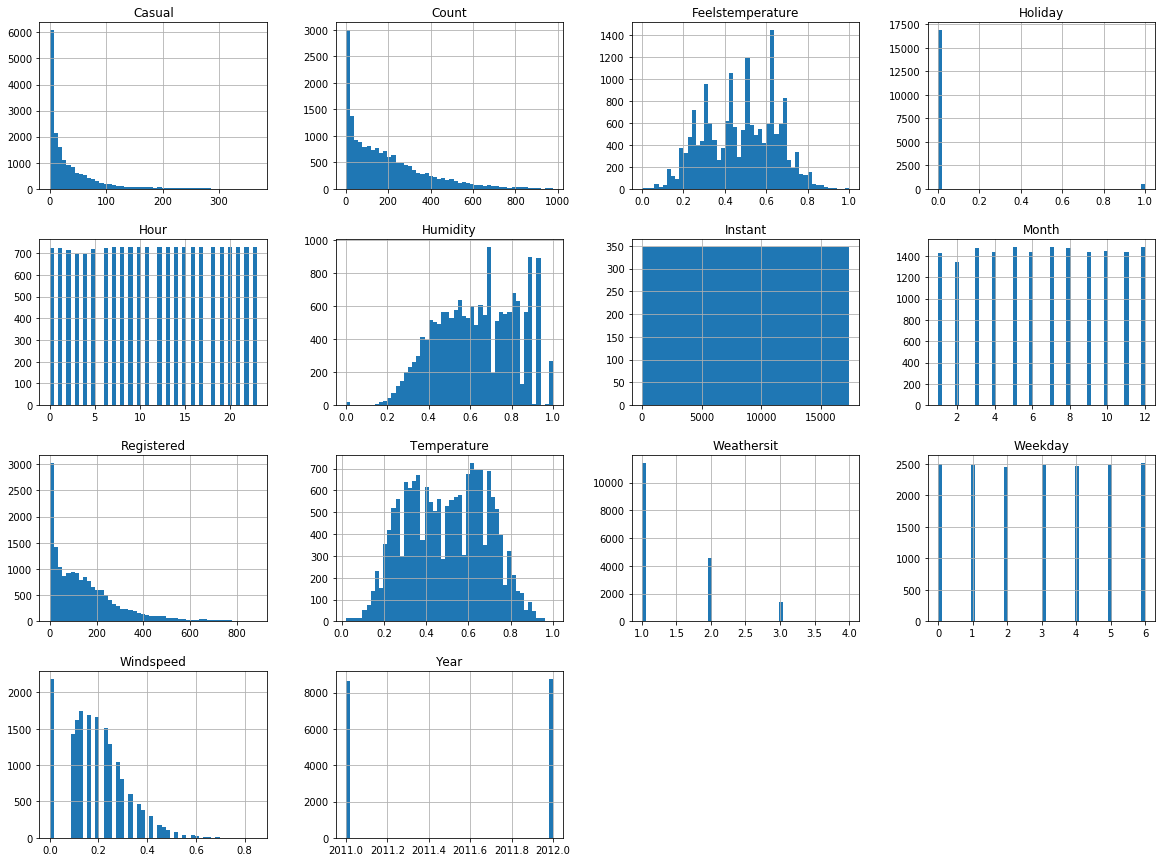

In [121]:
df1.hist(bins=50,figsize=(20,15))
plt.savefig("plots")
plt.show()

In [122]:
df1.columns

Index(['Instant', 'Dateday', 'Season', 'Year', 'Month', 'Hour', 'Holiday',
       'Weekday', 'Workingday', 'Weathersit', 'Temperature',
       'Feelstemperature', 'Humidity', 'Windspeed', 'Casual', 'Registered',
       'Count'],
      dtype='object')

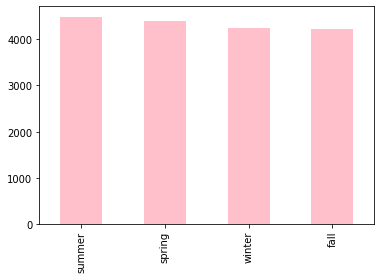

In [123]:
df1.Season.value_counts().plot(kind="bar",color="pink")

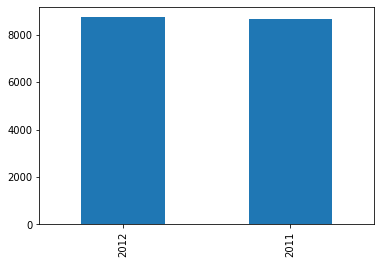

In [124]:
#year
df1.Year.value_counts().plot(kind="bar")

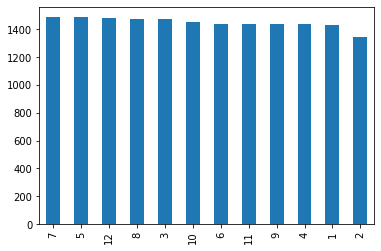

In [125]:
#month
df1.Month.value_counts().plot(kind="bar") 

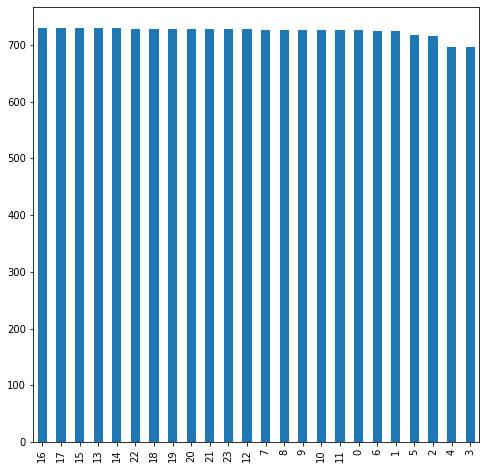

In [126]:
#hours
df1.Hour.value_counts().plot(kind="bar",figsize=(8,8))

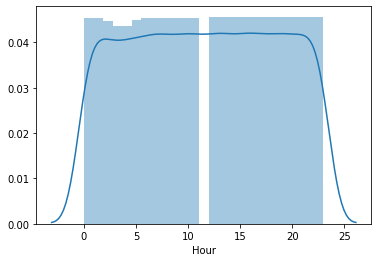

In [127]:
sns.distplot(df1.Hour)

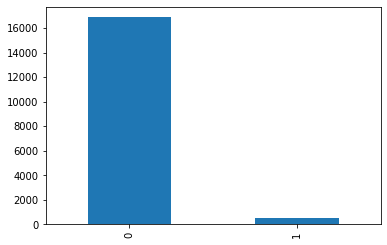

In [128]:
df1.Holiday.value_counts().plot(kind="bar")

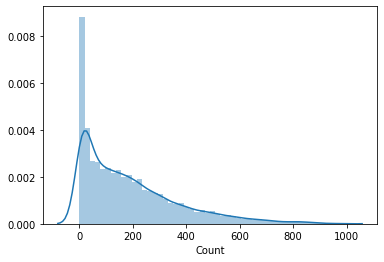

In [129]:
sns.distplot(df1.Count)

In [130]:
#lets do bivariate analysis for more better understanding 

# Bivariate Analysis 

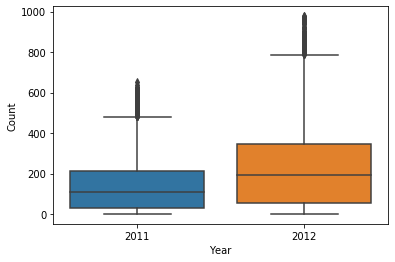

In [131]:
#count vs year with target variable
sns.boxplot(y="Count",x="Year",data=df1)

Obervation: We see that the number of bike is hired in year 2012 as compare to the bikes hired in 2011.

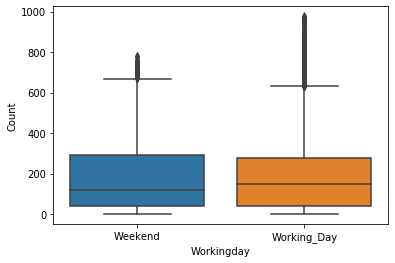

In [132]:
#count vs workingday 
sns.boxplot(y="Count",x="Workingday", data=df1)

In [133]:
df1.groupby(["Workingday"])['Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Workingday,,,,,,,,
Weekend,5514.0,181.405332,172.853832,1.0,40.0,119.0,292.0,783.0
Working_Day,11865.0,193.207754,185.107477,1.0,40.0,151.0,277.0,977.0


Observation: We can observe that a greater number of people are hiring bikes on working days than on weekends since a median of 151 people has hired bikes on working days when compared to a median of 119 people on weekends. From this, we can assume that people are using this facility for traveling to work or to college and a lesser number of them are using this facility for their weekend getaways.

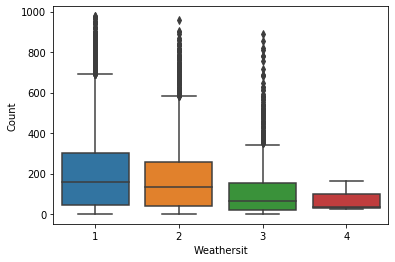

In [134]:
#count vs Weathersit 
sns.boxplot(y="Count", x="Weathersit", data=df1 )

In [135]:
df1.groupby(["Weathersit"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Weathersit,,,,,,,,
1,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
2,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
3,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0
4,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0


Observation: For this plot we observed obvious results i.e, when there is a clear / partly cloudy sky (1) there were maximum number of bikes rented (median of 159), and as the weather got worse the number of bikes hired got reduced with a median of 133 for cloudy, 63 for light rain and 36 for heavy rain.

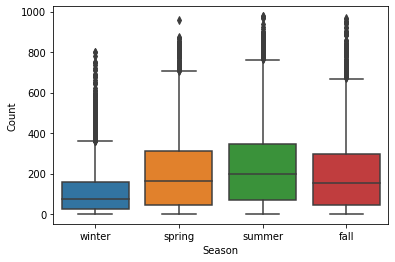

In [136]:
#Count vs Season 
sns.boxplot(y="Count",x="Season",data=df1) 

In [137]:
df1.groupby(["Season"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
fall,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0
spring,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
summer,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
winter,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0


Observation: We observe that in season 3 (summer), the median count of bikes hired are greater compared to any other seasons.

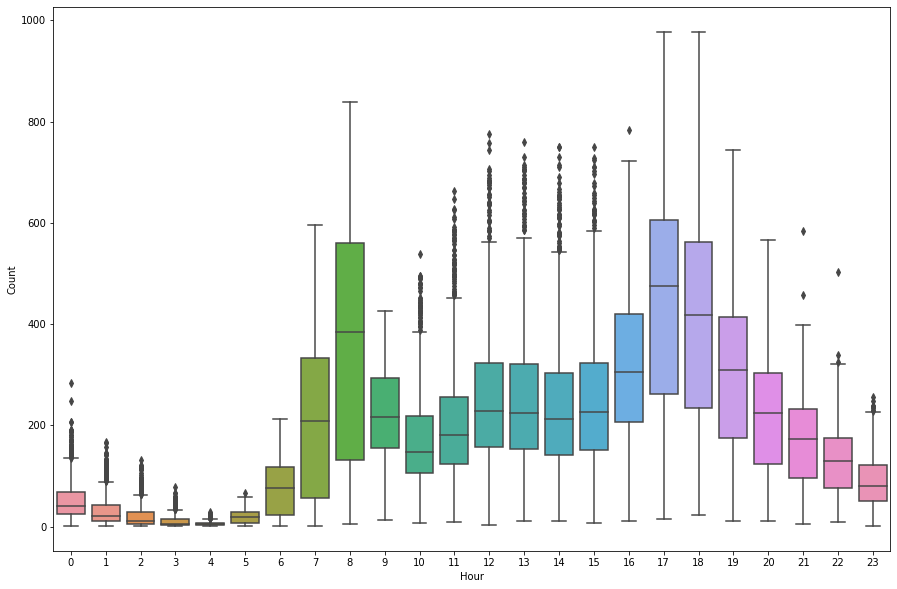

In [138]:
#Count vs houry
fig, ax1 = plt.subplots(figsize=(15, 10))
sns.boxplot(y="Count",x="Hour", data=df1) 

In [139]:
df1.groupby(["Hour"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Hour,,,,,,,,
0,726.0,53.898072,42.307910,2.0,25.00,40.0,69.00,283.0
1,724.0,33.375691,33.538727,1.0,11.00,20.0,42.25,168.0
2,715.0,22.869930,26.578642,1.0,5.00,11.0,28.50,132.0
3,697.0,11.727403,13.239190,1.0,3.00,6.0,15.00,79.0
4,697.0,6.352941,4.143818,1.0,3.00,6.0,8.00,28.0
5,717.0,19.889819,13.200765,1.0,8.00,19.0,29.00,66.0
6,725.0,76.044138,55.084348,1.0,23.00,76.0,117.00,213.0
7,727.0,212.064649,161.441936,1.0,55.50,208.0,332.00,596.0
8,727.0,359.011004,235.189285,5.0,131.50,385.0,559.50,839.0


Observation: We see that a greater number of bikes are rented at peak hours of 7-8 AM and 5-6 PM. The number of bikes rented is lowest during 4-5 AM

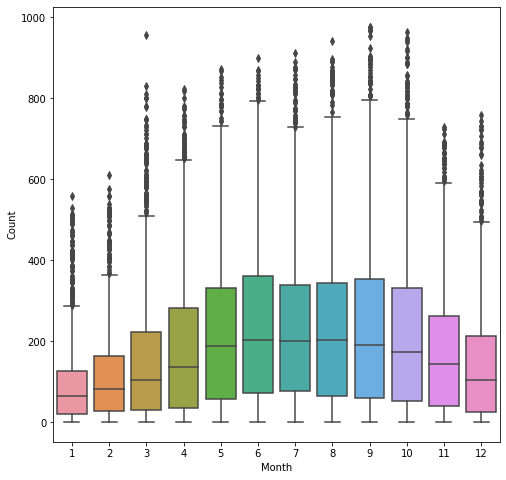

In [140]:
#count vs month
fig, ax1 = plt.subplots(figsize=(8, 8))
sns.boxplot(y = 'Count', x='Month', data = df1)

In [141]:
df1.groupby(["Month"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,1429.0,94.424773,99.907146,1.0,21.00,66.0,128.00,559.0
2,1341.0,112.865026,112.486565,1.0,28.00,82.0,164.00,610.0
3,1473.0,155.410726,163.543050,1.0,30.00,104.0,224.00,957.0
4,1437.0,187.260960,181.137902,1.0,36.00,136.0,282.00,822.0
5,1488.0,222.907258,187.721497,1.0,59.00,188.5,332.25,873.0
6,1440.0,240.515278,196.038950,1.0,73.75,203.0,362.00,900.0
7,1488.0,231.819892,187.483806,1.0,77.50,202.0,338.25,913.0
8,1475.0,238.097627,200.444648,1.0,65.50,204.0,343.00,941.0
9,1437.0,240.773138,214.609531,1.0,60.00,190.0,355.00,977.0


Observation: We observe that the count of the bikes rented is highest during the month June which falls in spring and summer season.

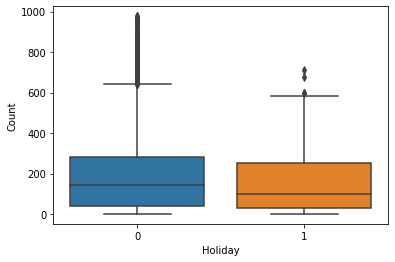

In [142]:
# Count vs Holiday
sns.boxplot(y = 'Count', x='Holiday', data = df1)

In [143]:
df1.groupby(["Holiday"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday,,,,,,,,
0,16879.0,190.42858,181.981435,1.0,40.00,144.0,281.50,977.0
1,500.0,156.87000,156.757478,1.0,28.75,97.0,253.25,712.0


Observation: We observe that greater number of bikes are hired on a working day than a nonworking day

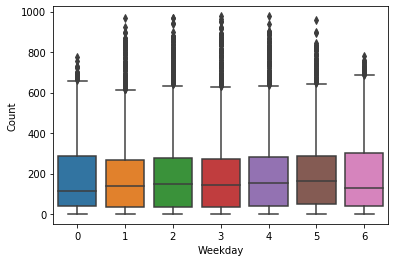

In [144]:
# Count vs Weekday
sns.boxplot(y = 'Count', x='Weekday', data = df1)

In [145]:
df1.groupby(["Weekday"])["Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,2502.0,177.468825,168.167710,1.0,40.0,116.0,288.0,776.0
1,2479.0,183.744655,179.514167,1.0,37.0,139.0,268.0,968.0
2,2453.0,191.238891,187.820480,1.0,36.0,147.0,276.0,970.0
3,2475.0,191.130505,190.894464,1.0,36.0,143.0,274.5,977.0
4,2471.0,196.436665,188.011923,1.0,42.0,154.0,280.0,976.0
5,2487.0,196.135907,174.076894,1.0,47.5,165.0,286.5,957.0
6,2512.0,190.209793,179.820569,1.0,42.0,129.0,300.0,783.0


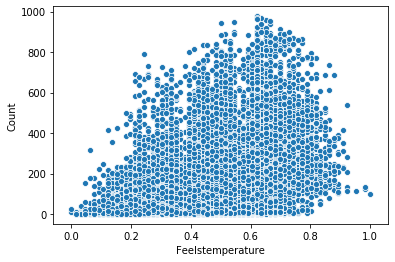

In [146]:
# Count vs atemp
sns.scatterplot(x = 'Feelstemperature', y = 'Count', data = df1)

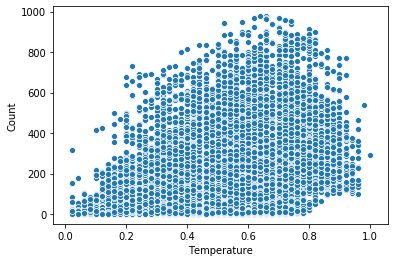

In [147]:
# Count vs temp
sns.scatterplot(x = 'Temperature', y = 'Count', data = df1 )

Observation: We see that as the temperature increases, i.e., as the weather gets warmer a greater number of bikes (count) have been hired which is evident from a red section of the bar graph.

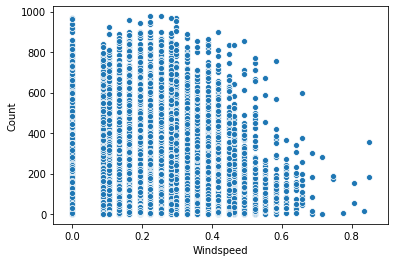

In [148]:
#Count vs Windspeed 
sns.scatterplot(x='Windspeed', y='Count', data=df1)

Observation: We see that the wind speed does not have any significant impact on the number of bikes rented because we don’t observe any specific pattern and also the highest count is observed to be when the wind speed is the highest

## Correlation Matrix and Heatmap

In [149]:
corr = df1.corr()
corr

,Instant,Year,Month,Hour,Holiday,Weekday,Weathersit,Temperature,Feelstemperature,Humidity,Windspeed,Casual,Registered,Count
Instant,1.000000,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
Year,0.866014,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
Month,0.489164,-0.010473,1.000000,-0.005772,0.018430,0.010400,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
Hour,-0.004775,-0.003867,-0.005772,1.000000,0.000479,-0.003498,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
Holiday,0.014723,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
Weekday,0.001357,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
Weathersit,-0.014198,-0.019157,0.005400,-0.020203,-0.017036,0.003311,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
Temperature,0.136178,0.040913,0.201691,0.137603,-0.027340,-0.001795,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
Feelstemperature,0.137615,0.039222,0.208096,0.133750,-0.030973,-0.008821,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
Humidity,0.009577,-0.083546,0.164411,-0.276498,-0.010588,-0.037158,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911


Text(0.5, 1, 'Heatmap of the Correlation Matrix')

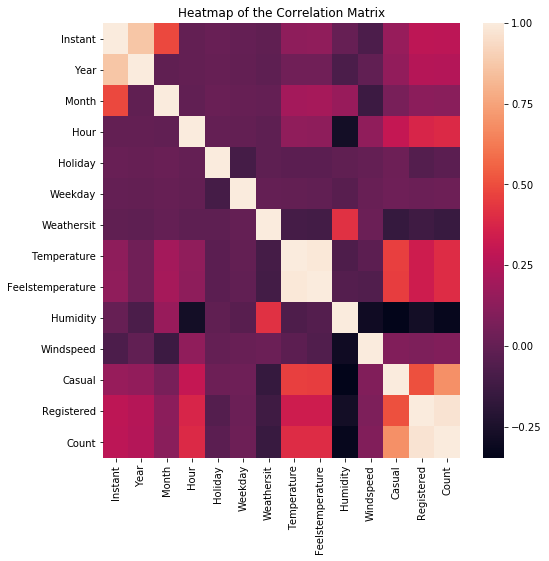

In [150]:
fig, ax1 = plt.subplots(figsize=(8, 8))
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')

Observation: From the correlation matrix, we can understand the correlation between all the variables. We see that there is a high correlation between registered and count, temp and atemp,season and month. Hence to reduce redundancy we have dropped one of the variables with high correlation i.e., we dropped registered, temp and month as they can be derived from the remaining columns.

## Step 4: Modify the Data


### Feature Engineering 
The variables hour, Season, Year, Weekday, Wathersit and Holiday are converted to categorical(nominal) type,

In [151]:
df1['Hour'] = df1['Hour'].astype(str)
df1['Season'] = df1['Season'].astype(str)
df1['Year'] = df1['Year'].astype(str)
df1['Weekday'] = df1['Weekday'].astype(str)
df1['Workingday'] = df1['Workingday'].astype(str)
df1['Weathersit'] = df1['Weathersit'].astype(str)
df1['Holiday'] = df1['Holiday'].astype(str)

**Significant variables considered for models:**
1. Since temp and atemp are highly correlated, temp has been dropped.


2. Total count is the sum of Registered and Casual columns and is highly correlated with Registered and Casual variables. Hence, they have been dropped to prevent ’data leakage’.


3. Holiday has been removed as the information has already been captured in the ‘Working day’ column.


4. Date has been extracted from ‘dteday’ column. Since information is provided in columns like ‘Year’,‘Month’, ‘Date’ and ‘Hour’, dteday column has been dropped.


5. Season has been removed as it can be interpreted from the month column.


6. The column Instant has also been removed.

In [152]:
df1.drop(['Instant','Temperature','Registered','Casual','Holiday','Dateday','Season','Year'],axis = 1, inplace = True)

In [153]:
df1.head()

,Month,Hour,Weekday,Workingday,Weathersit,Feelstemperature,Humidity,Windspeed,Count
0,1,0,6,Weekend,1,0.2879,0.81,0.0,16
1,1,1,6,Weekend,1,0.2727,0.80,0.0,40
2,1,2,6,Weekend,1,0.2727,0.80,0.0,32
3,1,3,6,Weekend,1,0.2879,0.75,0.0,13
4,1,4,6,Weekend,1,0.2879,0.75,0.0,1


In [154]:
#convert into 0 and 1 
df1["Workingday"].replace({'Weekend':0,"Working_Day":1}, inplace=True) 

In [155]:
#Now Apply the get dummies only single column 
df1 = pd.get_dummies(data = df1, columns=["Workingday"])

## Step 5: Modelling the Data 

In [156]:
#split the data into train and test 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [157]:
x = df1.drop("Count", axis=1)
y = df1.Count

In [160]:
#Raw Liner Regresssion model 
import math
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x, y)}')

Coefficients: [   4.98204022    7.4150109     1.84072011   -1.55368317  349.69066381
 -220.46480763   29.56511652   -2.97799413    2.97799413]
Intercept: 33.15707131541859
R^2 score: 0.334980610885274


In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 123)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(12165, 9)
(5214, 9)
(5214,)


In [169]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')
print(r2_score(y_test, model.predict(x_test)))

R^2 score for train: 0.34111591185804546
R^2 score for test: 0.3207441633671271
0.3207441633671271


In [170]:
regmodel = lin_reg.fit(x_train, y_train)
coef = lin_reg.coef_

y_predtrain = regmodel.predict(x_train)
y_predtest = regmodel.predict(x_test)

In [171]:
RMSEtrain = mean_squared_error(y_train, y_predtrain)**0.5
RMSEtest = mean_squared_error(y_test, y_predtest)**0.5
r2_train = r2_score(y_train, y_predtrain)
r2_test = r2_score(y_test, y_predtest)
print( "RMSE for the training data is: ", RMSEtrain)
print ("RMSE for the testing data is: ", RMSEtest)
print ("R^2 value for training data is: ", r2_train)
print ("R^2 value for testing data is: ", r2_test) 

RMSE for the training data is:  146.73943853012378
RMSE for the testing data is:  150.64312110166208
R^2 value for training data is:  0.34111591185804546
R^2 value for testing data is:  0.3207441633671271


In [180]:
#Decission Tree
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
dtree = tree.DecisionTreeRegressor(max_depth=3,)
dtree = dtree.fit(x_train,y_train)
print("\n\n ---Decision Tree Model---")
print(math.sqrt(mean_squared_error(y_test, dtree.predict(x_test))))
print(r2_score(y_test, dtree.predict(x_test)))



 ---Decision Tree Model---
133.41405018623507
0.46723227658490585


In [183]:
#Random Forest Tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf = rf.fit(x_train, y_train)
print ("\n\n ---Random Forest Tree ---")
print(math.sqrt(mean_squared_error(y_test, rf.predict(x_test))))
print(r2_score(y_test, rf.predict(x_test)))



 ---Random Forest Tree ---
70.23625824390713
0.8523418228470767


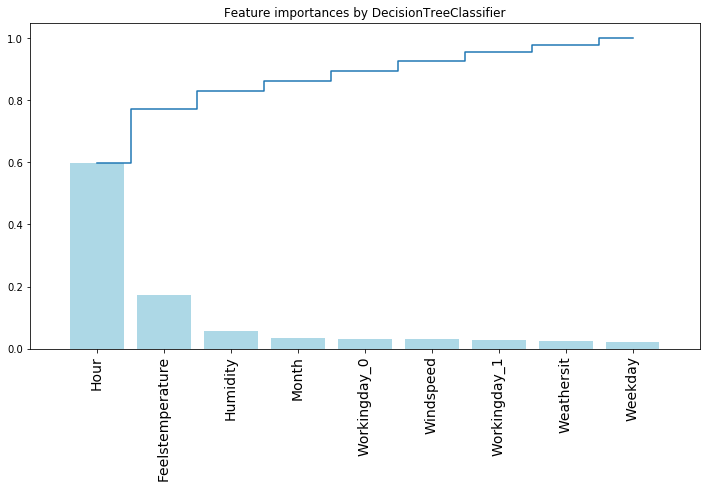

In [185]:
# Feature Importance

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = rf.feature_importances_
feat_names = df1.drop(['Count'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Conclusions:

1. The variable ‘hour’ is the most influential factor in predicting the total count of the rental bikes.
2. The second most key indicator in predicting the count of the rental bikes is FeelsTemperature.
3. The Random Forest tree model gives the best results in predicting the count which is observed through relatively smaller   RMSE values and larger accuracy score values.

Recommendations:

1. While analyzing the data, we observed that more bikes are rented out between 8-9 AM and 5-6 PM. Hence it would be profitable for the company to stock up on bikes at the kiosks during these times.
2. The company can devise different pricing strategies for peak hours vs non-peak hours to entice more customers to rent out the bikes.
3. A bulk maintenance of bikes can be done during the months of January and February as least number of bikes are rented out during these months. General maintenance can be conducted during 10-11 AM and 2-3 PM.
4. Since the contribution to the count of rental bikes is more from registered users than casual users, the company can offer customized discounts for the loyal customers. This will drive more conversion of casual users to registered.
5. Access to external data such as the pick-up and docking locations, customer data, and GPS information will help us develop a sensor network and analyze traffic patterns.